## 2-4. Classification
- 목표: 범주형 범수인 Y를 분류하는 Classifier 찾기!
- Regression과의 차이: loss fucnction을 이용해 model fitting
- Logistic Regression & LDA

## <1. Logistic Regression>

### 1. import dataset

In [2]:
# import package
import pandas as pd
math = pd.read_csv("http://home.ewha.ac.kr/~josong/dm/mathcat.data", sep = '\s+')
math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,Yes,Mainstrm,No,Failed
2,66.0,75,Yes,Mainstrm,Yes,Passed
3,80.2,70,Yes,Mainstrm,Yes,Passed
4,81.7,67,Yes,Mainstrm,Yes,Passed
5,86.8,80,Yes,Mainstrm,Yes,Passed


### 2. data preprocessing

In [3]:
math=math.drop('outcome', axis=1)
math.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,No
2,66.0,75,Yes,Mainstrm,Yes
3,80.2,70,Yes,Mainstrm,Yes
4,81.7,67,Yes,Mainstrm,Yes
5,86.8,80,Yes,Mainstrm,Yes


In [4]:
# 범주형 변수들의 value checking
math['hscalc'].value_counts()

Yes    373
No      21
Name: hscalc, dtype: int64

In [5]:
math['course'].value_counts()

Mainstrm    328
Catch-up     35
Elite        31
Name: course, dtype: int64

In [6]:
math['passed'].value_counts()

Yes    236
No     158
Name: passed, dtype: int64

### (1) Label Encoding

Y(target)에 해당되는 passed는 Label Encoding

In [7]:
'''
# LabelEncoding (Sol1)
from sklearn.preprocessing import LabelEncoder
items=math.columns[4:]
le=LabelEncoder()
for i in items:
    math[i]=le.fit_transform(math[i])
    
math.head()
'''

'\n# LabelEncoding (Sol1)\nfrom sklearn.preprocessing import LabelEncoder\nitems=math.columns[4:]\nle=LabelEncoder()\nfor i in items:\n    math[i]=le.fit_transform(math[i])\n    \nmath.head()\n'

In [8]:
'''
#LabelEncoding (Sol2)
items=math['passed']
le=LabelEncoder()
lab1=le.fit_transform(items)
math['passed']=lab1
math.head()
'''

"\n#LabelEncoding (Sol2)\nitems=math['passed']\nle=LabelEncoder()\nlab1=le.fit_transform(items)\nmath['passed']=lab1\nmath.head()\n"

In [10]:
#LabelEncoding (Sol3)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
math['passed']=le.fit_transform(math['passed'])
math.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,0
2,66.0,75,Yes,Mainstrm,1
3,80.2,70,Yes,Mainstrm,1
4,81.7,67,Yes,Mainstrm,1
5,86.8,80,Yes,Mainstrm,1


### (2) OneHot Encoding
- target이 아닌 hscalc, course에 대해 원핫인코딩

In [11]:
mymath1=math.copy()
mymath2=math.copy()

In [12]:
import pandas as pd
mymath1=pd.get_dummies(data=mymath1, columns=['hscalc','course'])

In [13]:
mymath1.head()

,hsgpa,hsengl,passed,hscalc_No,hscalc_Yes,course_Catch-up,course_Elite,course_Mainstrm
1,78.0,80,0,0,1,0,0,1
2,66.0,75,1,0,1,0,0,1
3,80.2,70,1,0,1,0,0,1
4,81.7,67,1,0,1,0,0,1
5,86.8,80,1,0,1,0,0,1


### (3) Data split
- 데이터를 X와 Y로 나누기

In [14]:
Y=mymath1.iloc[:,2]
mymath1.pop('passed')
X=mymath1.iloc[:,:]

In [15]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: passed, dtype: int32

In [16]:
X.head() #데이터가 잘 나뉘었다.

,hsgpa,hsengl,hscalc_No,hscalc_Yes,course_Catch-up,course_Elite,course_Mainstrm
1,78.0,80,0,1,0,0,1
2,66.0,75,0,1,0,0,1
3,80.2,70,0,1,0,0,1
4,81.7,67,0,1,0,0,1
5,86.8,80,0,1,0,0,1


### 3. Model Fitting

In [20]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')
mymodel=LogisticRegression()
mymodel.fit(X,Y)
LogisticRegression()

LogisticRegression()

### 4. Test Model
- 학습된 model의 예측값&실제값을 confusion matrix 이용해 판단

In [21]:
from sklearn.metrics import confusion_matrix
mymtx=confusion_matrix(Y, mymodel.predict(X))
mymtx

array([[ 98,  60],
       [ 38, 198]], dtype=int64)

In [24]:
# 오분류율(misclass rate) 계산
misclass_rate = (mymtx[0,1]+mymtx[1,0])/sum(sum(mymtx))
round(misclass_rate, 3)

0.249

## <2. LDA(Linear Discriminant Analysis>

### (1) import dataset

In [1]:
#import package
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#import dataset
myiris=datasets.load_iris()

### (2) data preprocessing

In [2]:
X=myiris.data
Y=myiris.target
target_names=myiris.target_names

In [3]:
print(X.shape)

(150, 4)


In [4]:
print(X[:5]) #X의 head

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
print(X[-5:]) #X의 tail

[[6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


### (3) model fitting

In [8]:
#LDA
lda=LinearDiscriminantAnalysis(n_components=2) #n_components=(number of class-1)
res=lda.fit(X,Y).transform(X)

### (4) Test model

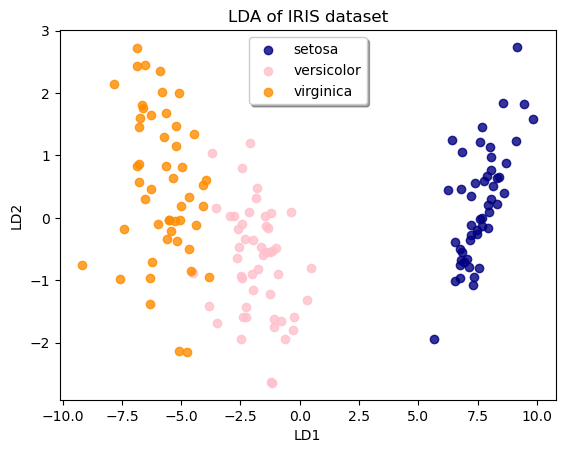

In [9]:
## 1-i. Visualization_y를 가장 잘 분류하는 축 찾기! -> LD1
plt.figure()
colors=['navy', 'pink', 'darkorange']
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(res[Y==i,0], res[Y==i,1], alpha=0.8, color=color, label=target_name)

    
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best', shadow=True, scatterpoints=1) #scatterpoints: legend 안의 마커포인트의 수
plt.title('LDA of IRIS dataset')
plt.show()

C:\Users\Kim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


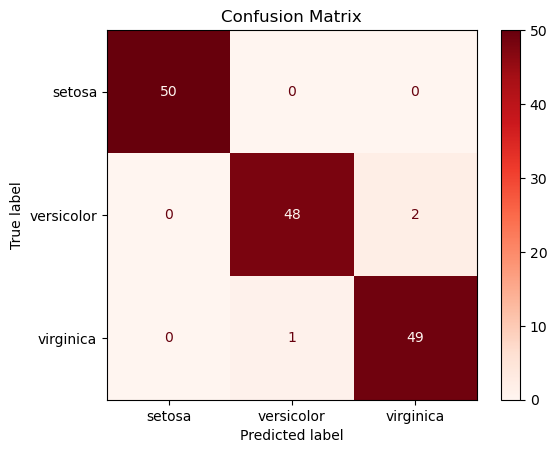

In [32]:
## 1-ii. Visualization_confusion matrix

#import package
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#confusion matrix
label=['setosa', 'versicolor', 'virginica'] #label 설정
plot=plot_confusion_matrix(lda, X, Y, display_labels=label, cmap=plt.cm.Reds, normalize=None)
plot.ax_.set_title('Confusion Matrix')
plt.show()

### 

In [35]:
## 2-i. Confusion matrix_정상출력

from sklearn.metrics import confusion_matrix
mymtx=confusion_matrix(Y, lda.predict(X))
mymtx

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [36]:
## 2-ii. Confusion matrix_pandas의 dataframe
import pandas as pd
table=pd.DataFrame(mymtx, columns=label, index=label)
table

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49


> Setosa의 분류 정확도가 높다.

- accuracy=1-오분류율
- 여기서 오분류율=(1+2)/150=3/150